In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [13]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
val_df = pd.read_csv('data/val.csv')

In [14]:
train_df

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113837,284796,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,-0.169496,1.034857
113838,284797,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,0.530986,1.034881
113839,284798,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.230699,1.034904
113840,284802,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,-0.269825,1.034939


In [15]:
train_x = train_df.drop(columns = ['ID'])
train_x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113837,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,8.655320,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,-0.169496,1.034857
113838,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,0.120908,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,0.530986,1.034881
113839,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.230699,1.034904
113840,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,-0.269825,1.034939


In [16]:
val_x = val_df.drop(columns= ['ID'])
val_x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,0.724396,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,0.757952,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,-0.225495,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,6.051521,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28457,-0.546378,1.433992,-0.313252,0.926044,0.522388,-0.565669,1.066075,0.269799,-1.099446,-0.077753,...,0.778817,-0.175451,0.030397,0.018381,-0.395994,0.301655,0.173585,0.202753,1.034622,0
28458,-0.764523,0.588379,-0.907599,-0.418847,0.901528,-0.760802,0.758545,0.414698,-0.730854,-1.245088,...,-0.431876,0.141759,0.587119,-0.200998,0.267337,-0.152951,-0.065285,0.810452,1.034693,0
28459,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,0.076605,...,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,0.537972,1.034763,0
28460,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,...,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,-0.269964,1.034928,0


In [17]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators=50, max_samples = 50, contamination = float(0.005), max_features= 1.0, bootstrap= False, n_jobs = -1, random_state= None, verbose= 0)

# 50개의 노드 수, 최대 50개의 샘플
# 0.04%의 outlier 색출
clf.fit(train_x)
pred = clf.predict(train_x)
train_x['Class'] = pred
outliers = train_x.loc[train_x['Class'] == -1]
outlier_index = list(outliers.index)

print(train_x['Class'].value_counts()) 

 1    113272
-1       570
Name: Class, dtype: int64


In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

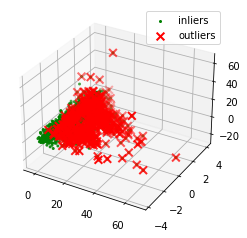

In [19]:
pca = PCA(n_components=3)
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(train_x)
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
#Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs = X_reduce[:, 2], s = 4, lw = 1, label = "inliers", c = 'green')
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0], X_reduce[outlier_index, 1], X_reduce[outlier_index,2], lw = 2, s = 60, marker = 'x', c = 'red', label = 'outliers')
ax.legend()
plt.show()

In [20]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(train_x)
res = pd.DataFrame(pca.transform(train_x))
res

,0,1
0,4.504552,0.822673
1,0.596632,1.026857
2,-1.367451,0.841568
3,-0.857226,1.074256
4,0.062433,1.019250
...,...,...
113837,-1.294787,13.321579
113838,-0.506373,-1.975451
113839,-1.287074,0.481269
113840,-1.404194,0.120117


In [21]:
Z = np.array(res)
Z

array([[ 4.50455186,  0.82267253],
       [ 0.59663203,  1.02685744],
       [-1.36745051,  0.84156814],
       ...,
       [-1.28707363,  0.48126935],
       [-1.40419416,  0.12011732],
       [-1.47998623, 12.53582492]])

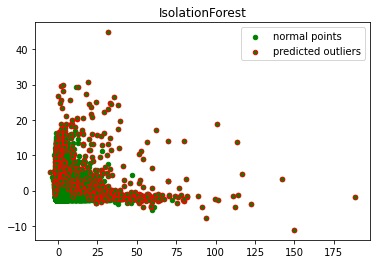

In [22]:
plt.title("IsolationForest")
#plt.contourf(Z, cmap = plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c = 'green', s = 20, label = "normal points")
b1 = plt.scatter(res.iloc[outlier_index, 0], res.iloc[outlier_index,1], c = 'green', s = 20, edgecolor = "red", label = "predicted outliers")
plt.legend(loc = "upper right")
plt.show()

전처리(표준화 작업)

In [23]:
from sklearn.preprocessing import StandardScaler


In [26]:
target_x = val_x.drop(['Class'], axis = 1).values # 독립변인들의 value값 추출
target_y = val_x['Class'].values # 종속변인 추출

target_x = StandardScaler().fit_transform(target_x) # x객체에 x를 표준화한 데이터를 저장



features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30']
pd.DataFrame(target_x, columns = features).head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,-0.177783,0.696237,0.695431,-0.159474,0.376991,-0.177243,0.554477,0.054839,-0.670890,-0.336130,...,-0.352327,-0.880277,-0.207943,-0.640623,-0.136693,0.193235,0.625880,0.273897,-0.352503,-1.996993
1,0.495973,0.203372,-0.115283,1.499744,0.849011,1.326248,0.087679,0.464405,-1.087624,0.670049,...,0.205443,0.556282,-0.085021,-2.276673,0.737451,0.411398,0.042845,-0.047128,-0.225563,-1.996825
2,0.590777,0.357005,0.128420,1.847750,-0.066092,-0.794541,0.451486,-0.227374,-0.817165,0.700989,...,0.015828,-0.167643,-0.132637,1.143898,1.199001,0.099468,-0.133608,0.054282,-0.225396,-1.996320
3,0.477619,-0.202906,0.257495,0.386148,0.187815,1.290898,-0.371751,0.549468,0.211934,-0.205798,...,-0.057825,0.108320,0.161788,-1.647833,0.157181,0.777498,0.092881,-0.018716,-0.177059,-1.996257
4,-1.559201,1.618597,0.988368,-1.722540,0.232409,-0.624400,1.767959,-1.665917,3.679938,5.581918,...,-1.216132,-0.252992,-0.280983,0.852936,0.254404,0.947893,-0.636024,-3.633134,-0.361769,-1.996088


PCA 실행

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printicipalComponenets = pca.fit_transform(target_x)
principalDF = pd.DataFrame(data = printicipalComponenets, columns = ['principal componenet1', 'principal component2']) 
# 주성분으로 이루어진 데이터 프레임 구성


In [30]:
principalDF.head()

,principal componenet1,principal component2
0,-0.357402,-1.825526
1,-0.237843,-2.197722
2,-0.203358,-1.865661
3,-0.129784,-2.325439
4,0.214692,-1.956576
